Beata Sirowy

# Bayesian statistics in practice: strength of evidence

Based on: Downey, A. (2021) _Think Bayes_

## Odds

The odds in favor of an event are the ratio of
the probability it will occur to the probability that it will not, e.g.  “the odds are three to one”. 
The following function does this calculation:

In [1]:
def odds(p):
    return p / (1-p)

For example, if my team has a 75% chance of winning, the odds in their favor
are three to one, because the chance of winning is three times the chance of
losing:

In [2]:
odds(0.75)

3.0

When probabilities are low, it is more common to report the odds against rather
than the odds in favor. For example, if my horse has a 10% chance of winning,
the odds in favor are 1:9:

In [3]:
odds(0.1)

0.11111111111111112

But in that case it would be more common to say that the odds against are 9:1:

In [4]:
odds(0.9)

9.000000000000002

Given the odds in favor, in decimal form, you can convert to probability like
this:

In [6]:
def prob(o):
    return o / (o+1)

In [10]:
prob(9/1)

0.9

Or if you represent odds with a numerator and denominator, you can convert to
probability like this:

In [14]:
def prob2(yes, no):
    return yes / (yes + no)

In [16]:
prob2(9, 1)



0.9

Probabilities and odds are different representations of the same information;
given either one, you can compute the other. But some computations are easier
when we work with odds, as we’ll see in the next section, and some
computations are even easier with log odds, which we’ll see later.

## Bayes’s Rule
So far we have worked with Bayes’s theorem in the “probability form”:

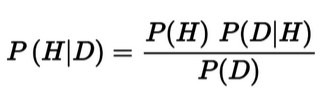

Writing odds(A) for odds in favor of A , we can express Bayes’s theorem in
“odds form”:

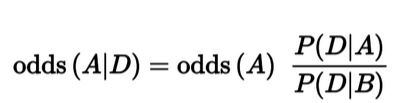

This is Bayes’s rule, which says that __the posterior odds are the prior odds times
the likelihood ratio__.

Bayes’s rule is convenient for computing a Bayesian update
on paper or in your head. 

For example, let’s go back to the Cookie Problem:

_Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies
and 10 chocolate cookies. Bowl 2 contains 20 of each. Now suppose you
choose one of the bowls at random and, without looking, select a cookie at
random. The cookie is vanilla. What is the probability that it came from Bowl
1?_

- The prior probability is 50%, so the prior odds are 1. 
- The likelihood ratio is (3/4)/(1/2) or 3/2, or . 
- So the posterior odds are 3/2 which corresponds to probability 3/5


In [17]:
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
post_odds

1.5

In [18]:
post_prob = post_odds / (post_odds +1)
post_prob

0.6

If we draw another cookie and it’s chocolate, we can do another update:

In [19]:
likelihood_ratio = (1/4) / (1/2)
post_odds *= likelihood_ratio
post_odds

0.75

In [20]:
post_prob = post_odds / (post_odds +1)
post_prob

0.42857142857142855

### Oliver’s Blood
We’ll use Bayes’s rule to solve another problem from MacKay’s _Information
Theory, Inference, and Learning Algorithms_:


_Two people have left traces of their own blood at the scene of a crime. A
suspect, Oliver, is tested and found to have type ‘O’ blood. The blood groups
of the two traces are found to be of type ‘O’(a common type in the local
population, having frequency 60%) and of type ‘AB’(a rare type, with
frequency 1%). Do these data [the traces found at the scene] give evidence in
favor of the proposition that Oliver was one of the people [who left blood at
the scene]?_

- To answer this question, we need to think about what it means for data to give
evidence in favor of (or against) a hypothesis. Intuitively, we might say that data
favor a hypothesis if the hypothesis is more likely in light of the data than it was
before.
- In the Cookie Problem, the prior odds are 1, which corresponds to probability
50%. The posterior odds are 3/2 , or probability 60%. So the vanilla cookie is evidence in favor of Bowl 1.



Bayes’s rule provides a way to make this intuition more precise. 

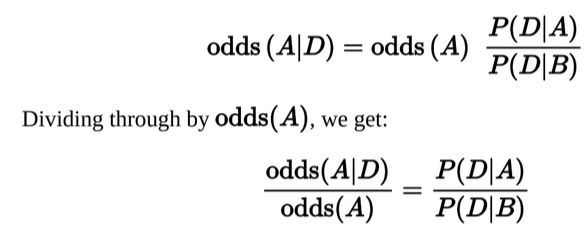

- The term on the left is the ratio of the posterior and prior odds. 
- The term on the
right is the likelihood ratio, also called the __Bayes factor__.

__If the Bayes factor is greater than 1__, that means that the data were more likely
under A than under B . And that means that the odds are greater, in light of the
data, than they were before.

__If the Bayes factor is less than 1__, that means the data were less likely under A
than  under B , so the odds in favor A of go down.

__If the Bayes factor is exactly 1__, the data are equally likely under either
hypothesis, so the odds do not change.

Getting back to the Oliver problem:

If Oliver is one of the people who left
blood at the crime scene, he accounts for the ‘O’ sample; in that case
- the
probability of the data is the probability that a random member of the population
has type ‘AB’ blood, which is 1%.

If Oliver did not leave blood at the scene, we have two samples to account for. If
we choose two random people from the population, what is the chance of finding
one with type ‘O’ and one with type ‘AB’? There are two ways it might
happen:
- The first person might have ‘O’ and the second ‘AB’,
- Or the first person might have ‘AB’ and the second ‘O’.
The probability of either combination is (0.6)(0.01), which is 0.6%, so the total
probability is twice that, or 1.2%. So the data are a little more likely if Oliver is not one of the people who left blood at the scene.

We can use these probabilities to compute the __likelihood ratio__:

In [21]:
like1 = 0.01
like2 = 2 * 0.6 * 0.01

likelihood_ratio = like1 / like2
likelihood_ratio

0.8333333333333334

Since the likelihood ratio is less than 1, the blood tests are evidence against the
hypothesis that Oliver left blood at the scence.
- But it is weak evidence. For example, if the prior odds were 1 (that is, 50%
probability), the posterior odds would be 0.83, which corresponds to a
probability of 45%:

In [22]:
post_odds = 1 * like1 / like2
post_prob = post_odds / (post_odds +1)
post_prob

0.45454545454545453

This example is a little contrived, but it demonstrates the counterintuitive result
that data consistent with a hypothesis are not necessarily in favor of the
hypothesis. This way of thinking might help: the data consist of
a common event, type ‘O’ blood, and a rare event, type ‘AB’ blood. 
- If Oliver
accounts for the common event, that leaves the rare event unexplained. 
- If Oliver
doesn’t account for the ‘O’ blood, we have two chances to find someone in the
population with ‘AB’ blood. And that factor of two makes the difference.